<a href="https://colab.research.google.com/github/gjurcin/regression_ffnn_/blob/main/Workshop_w8_Assignment_20201128.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Info

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- **cnt: count of total rental bikes including both casual and registered**
-------------------------

**categorical : season, hr, mnth, weekday, weathersit**
**Already Normalized: temp, hum, windspeed**
**For normalization : casual, registed, cnt**

# Target variable CNT


# Your task is to :
  * Drop unnecessary high-correlated features, we must remove 'dteday' feature
  * Scale numerical featurs
  * Make one hot encoding to categorical features
  * Eliminate features that have corelation > 0.65 with the **target** feature "cnt"
  * Make neural network architecture
  * Save best weights with checkpoint
  * Load weights and use model.predict to visualize difference between test_targets and prediction_targets





In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import *
from keras.models import Model
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Read Dataset

In [112]:
path = 'hour.csv'
data = pd.read_csv(path, parse_dates=['dteday'])

# Print first 10 rows of the Dataset

In [113]:
data.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [115]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Feature Engineering

In [116]:
data['sale_week'] = data.dteday.dt.week
data['sale_day'] = data.dteday.dt.day
data['sale_dayofyear'] = data.dteday.dt.dayofyear
data['is_month_end'] = data.dteday.dt.is_month_end
data['is_month_start'] = data.dteday.dt.is_month_start
data['is_quarter_end'] = data.dteday.dt.is_quarter_end
data['is_quarter_start'] = data.dteday.dt.is_quarter_start
data['is_year_end'] = data.dteday.dt.is_year_end
data['is_year_start'] = data.dteday.dt.is_year_start
data['days_in_month'] = data.dteday.dt.days_in_month
data['is_leap_year'] = data.dteday.dt.is_leap_year

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [117]:
data.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,sale_week,sale_day,sale_dayofyear,is_month_end,is_month_start,is_quarter_end,is_quarter_start,is_year_end,is_year_start,days_in_month,is_leap_year
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,52,1,1,False,True,False,True,False,True,31,False
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,52,1,1,False,True,False,True,False,True,31,False
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,52,1,1,False,True,False,True,False,True,31,False
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,52,1,1,False,True,False,True,False,True,31,False
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,52,1,1,False,True,False,True,False,True,31,False
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,52,1,1,False,True,False,True,False,True,31,False
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,52,1,1,False,True,False,True,False,True,31,False
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,52,1,1,False,True,False,True,False,True,31,False
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,52,1,1,False,True,False,True,False,True,31,False
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14,52,1,1,False,True,False,True,False,True,31,False


# Calculate mean and std of cnt (Before scaling)

In [118]:
cnt_mean = data['cnt'].mean()  
cnt_std = data['cnt'].std()

# Visualize data per day

In [119]:
data['dteday'] = data['dteday'].dt.strftime('%Y-%m-%d')

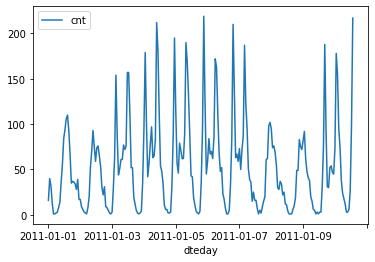

In [120]:
items_per_day = 24
days = 10

first_ten_dats = data[:items_per_day*days]

first_ten_dats.plot(x='dteday', y='cnt')

# Visualize features corelation

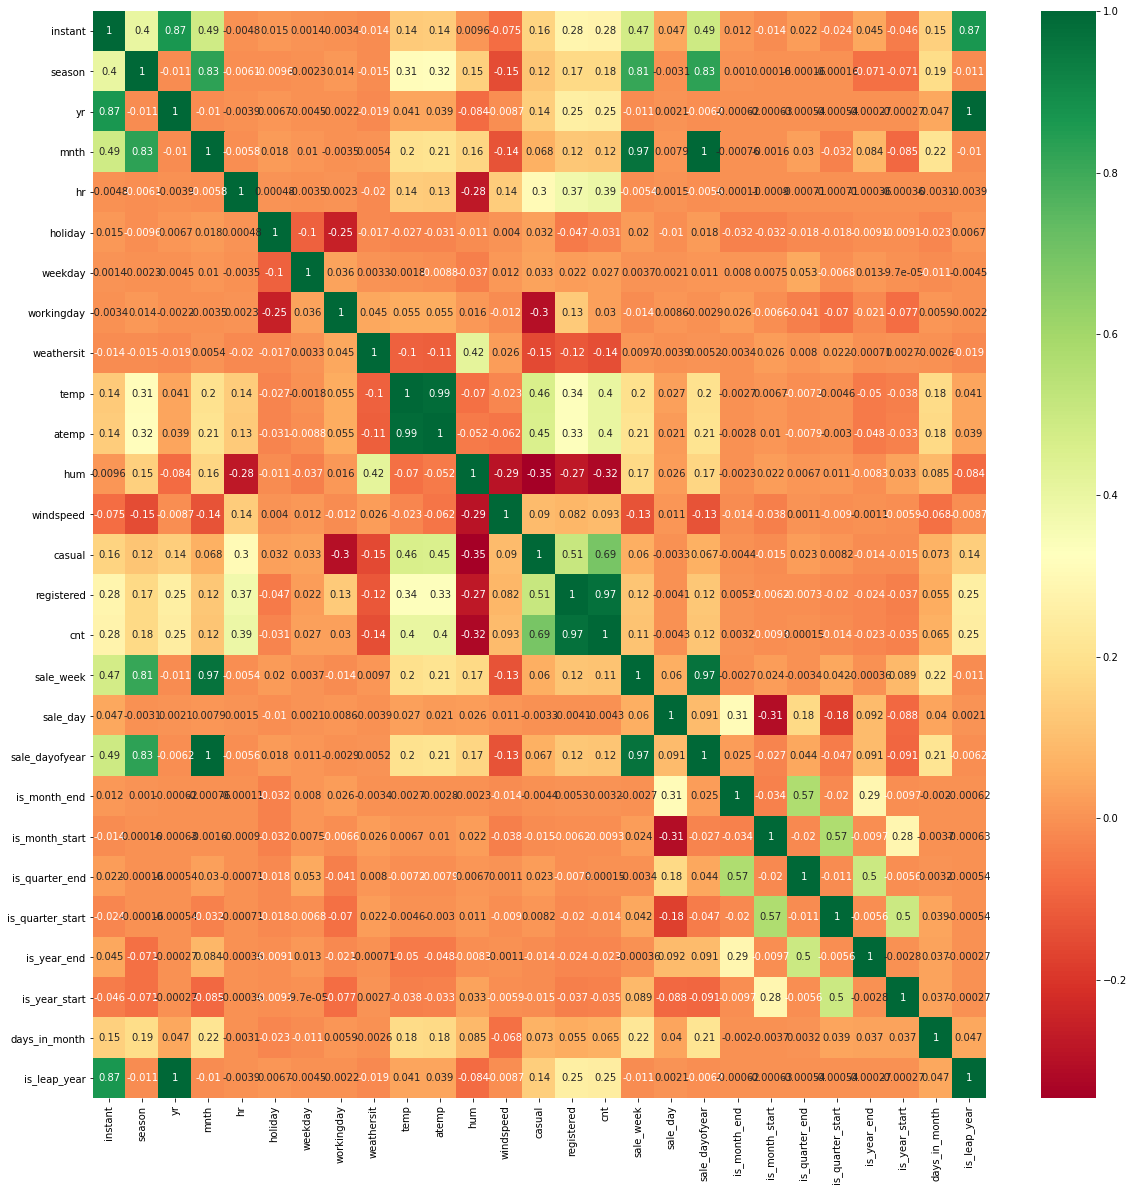

In [121]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

g=sns.heatmap(data[top_corr_features].corr(),
              annot=True,
              cmap="RdYlGn")

# Helper Methods

In [122]:
def make_one_hot_encoding(fields, data):
  """ Note : this method doesn't remove the original fields"""
  data_new = data.copy()
  for field in fields:
      one_hot_converted = pd.get_dummies(data[field], prefix=field, drop_first=False)
      data_new = pd.concat([data_new, one_hot_converted], axis=1)
  return data_new

def drop_fields(fields, data):
  data_new = data.copy()
  data_new = data_new.drop(fields, axis=1)
  return data_new

def scale_features(features, data):
  data_new = data.copy()
  scaler = preprocessing.StandardScaler()
  scaled_df = scaler.fit_transform(data_new[features])
  scaled_df = pd.DataFrame(scaled_df, columns=features)
  data_new.loc[:, features] = scaled_df
  return data_new


# Make One Hot Encoding

In [123]:
one_hot_fields = []
for col in data.columns:
  if len(data[col].unique()) < 10:
    print(col, len(data[col].unique()))
    one_hot_fields.append(col)

season 4
yr 2
holiday 2
weekday 7
workingday 2
weathersit 4
is_month_end 2
is_month_start 2
is_quarter_end 2
is_quarter_start 2
is_year_end 2
is_year_start 2
days_in_month 4
is_leap_year 2


In [124]:
# one hot encoding here
fields = one_hot_fields
data_one_hot = make_one_hot_encoding(fields, data)

In [125]:
data_one_hot = drop_fields(fields, data_one_hot)

# Drop fields with high correlation and the original fields that were  one hot encoded 
 * Also drop fields that are high correlated with *cnt (correlation>0.65)

In [126]:
corrmat.cnt[(corrmat.cnt > 0.65) | (corrmat.cnt < -0.65)]

casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [127]:
fields = ['casual', 'registered']
data_drop = drop_fields(fields, data_one_hot)
data_drop = drop_fields(['instant', 'dteday'], data_drop)

# Scale Features

* Scale features that are not previously scaled

In [128]:
data_drop.head(5)

,mnth,hr,temp,atemp,hum,windspeed,cnt,sale_week,sale_day,sale_dayofyear,season_1,season_2,season_3,season_4,yr_0,yr_1,holiday_0,holiday_1,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4,is_month_end_False,is_month_end_True,is_month_start_False,is_month_start_True,is_quarter_end_False,is_quarter_end_True,is_quarter_start_False,is_quarter_start_True,is_year_end_False,is_year_end_True,is_year_start_False,is_year_start_True,days_in_month_28,days_in_month_29,days_in_month_30,days_in_month_31,is_leap_year_False,is_leap_year_True
0,1,0,0.24,0.2879,0.81,0.0,16,52,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,1,1,0
1,1,1,0.22,0.2727,0.80,0.0,40,52,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,1,1,0
2,1,2,0.22,0.2727,0.80,0.0,32,52,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,1,1,0
3,1,3,0.24,0.2879,0.75,0.0,13,52,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,1,1,0
4,1,4,0.24,0.2879,0.75,0.0,1,52,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,1,1,0


In [129]:
fields = ['mnth', 'hr', 'cnt', 'sale_week', 'sale_day', 'sale_dayofyear']
data_scaled = scale_features(fields, data_drop)

# Print first 5 rows of the data

In [130]:
data_scaled.head(5)

,mnth,hr,temp,atemp,hum,windspeed,cnt,sale_week,sale_day,sale_dayofyear,season_1,season_2,season_3,season_4,yr_0,yr_1,holiday_0,holiday_1,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4,is_month_end_False,is_month_end_True,is_month_start_False,is_month_start_True,is_quarter_end_False,is_quarter_end_True,is_quarter_start_False,is_quarter_start_True,is_year_end_False,is_year_end_True,is_year_start_False,is_year_start_True,days_in_month_28,days_in_month_29,days_in_month_30,days_in_month_31,is_leap_year_False,is_leap_year_True
0,-1.610438,-1.670004,0.24,0.2879,0.81,0.0,-0.956339,1.691336,-1.670635,-1.737513,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,1,1,0
1,-1.610438,-1.525374,0.22,0.2727,0.80,0.0,-0.824022,1.691336,-1.670635,-1.737513,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,1,1,0
2,-1.610438,-1.380744,0.22,0.2727,0.80,0.0,-0.868128,1.691336,-1.670635,-1.737513,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,1,1,0
3,-1.610438,-1.236115,0.24,0.2879,0.75,0.0,-0.972879,1.691336,-1.670635,-1.737513,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,1,1,0
4,-1.610438,-1.091485,0.24,0.2879,0.75,0.0,-1.039037,1.691336,-1.670635,-1.737513,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,1,1,0


# Data separation

* Split data between training set and test set
* Separate data between features and targets


In [131]:
test_data = data_scaled[-21*24:] 

train_data = data_scaled[:-21*24]

target_fields = ['cnt']

X_train, Y_train = train_data.drop(target_fields, axis=1), train_data[target_fields]
X_test, Y_test = test_data.drop(target_fields, axis=1), test_data[target_fields]

In [132]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(16875, 48)
(16875, 1)
(504, 48)
(504, 1)


# Define Neural network Architecture

In [192]:
model = Sequential()

model.add(Dense(44, input_dim=48, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(35, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 44)                2156      
_________________________________________________________________
dense_58 (Dense)             (None, 40)                1800      
_________________________________________________________________
dense_59 (Dense)             (None, 35)                1435      
_________________________________________________________________
dense_60 (Dense)             (None, 30)                1080      
_________________________________________________________________
dense_61 (Dense)             (None, 25)                775       
_________________________________________________________________
dense_62 (Dense)             (None, 20)                520       
_________________________________________________________________
dense_63 (Dense)             (None, 15)               

# Compile Model, specify loss, optimizer, and metrics

In [193]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

In [194]:
callback1 = ModelCheckpoint('best_model.pt', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
callaback2 = EarlyStopping(patience=5)
callback_list = [callback1, callaback2]

# Load best weights

In [195]:
model.fit(X_train, Y_train,
          batch_size=32,
          epochs=20,
          callbacks=callback_list,
          validation_data=(X_test, Y_test))

Epoch 1/20
526/528 [============================>.] - ETA: 0s - loss: 0.5032 - mse: 0.5032
Epoch 00001: val_loss improved from inf to 0.30121, saving model to best_model.pt
INFO:tensorflow:Assets written to: best_model.pt/assets
528/528 [==============================] - 3s 5ms/step - loss: 0.5026 - mse: 0.5026 - val_loss: 0.3012 - val_mse: 0.3012
Epoch 2/20
522/528 [============================>.] - ETA: 0s - loss: 0.2100 - mse: 0.2100
Epoch 00002: val_loss improved from 0.30121 to 0.17842, saving model to best_model.pt
INFO:tensorflow:Assets written to: best_model.pt/assets
528/528 [==============================] - 2s 5ms/step - loss: 0.2091 - mse: 0.2091 - val_loss: 0.1784 - val_mse: 0.1784
Epoch 3/20
513/528 [============================>.] - ETA: 0s - loss: 0.1201 - mse: 0.1201
Epoch 00003: val_loss did not improve from 0.17842
528/528 [==============================] - 1s 3ms/step - loss: 0.1193 - mse: 0.1193 - val_loss: 0.1784 - val_mse: 0.1784
Epoch 4/20
518/528 [=============

In [196]:
from keras.models import load_model
model = load_model('best_model.pt')

In [197]:
results = model.evaluate(X_test, Y_test, batch_size=32)
print(results)

16/16 [==============================] - 0s 2ms/step - loss: 0.1004 - mean_squared_error: 0.1004
[0.100377656519413, 0.100377656519413]


# Fit the model : 
 * train the model on 20 epochs, 
 * save the best weights based on mse on each epoch

# Evaluation

In [198]:
targets = Y_test['cnt'].to_numpy() * cnt_std + cnt_mean
predictions = model.predict(X_test).T * cnt_std + cnt_mean


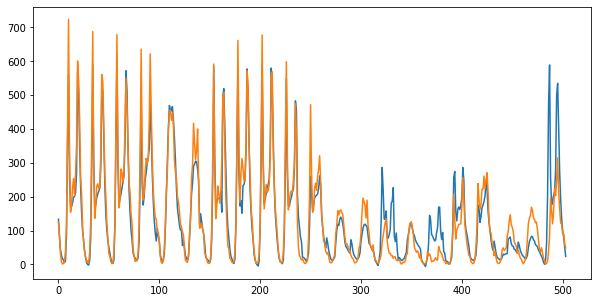

In [199]:
figure = plt.figure(figsize=(10,5))
plt.plot(predictions[0])
plt.plot(targets)

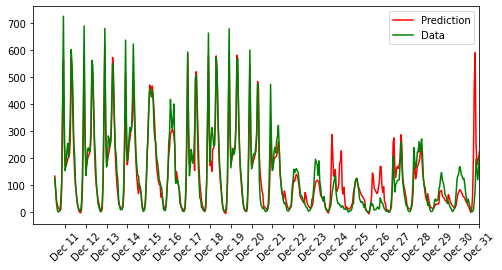

In [200]:
fig, ax = plt.subplots(figsize=(8,4))

ax.plot(predictions[0], label='Prediction', color='red')
ax.plot((Y_test['cnt']*cnt_std + cnt_mean).values, label='Data', color='green')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(data.iloc[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)